In [1]:
# model to predict user will click the ad or not based on his experience and estimated salary for a given data

In [2]:
# import libraries
import os
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# feature scaling
from sklearn.preprocessing import StandardScaler
# for handling categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
# for logistic regression model
from sklearn.linear_model import LogisticRegression
# import function python file
import importlib.util
from sklearn.metrics import confusion_matrix

import pickle

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("function", "/home/admin1/PycharmProjects/Machine-Learning-Followship-Program/week10/Utility/common_function.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
object_common_function = foo.function()


In [4]:
# load train dataset

test_data = object_common_function.load_data("CSV_files/test_file.csv")
print("test_data has {} rows and {} Columns".format(test_data.shape[0],test_data.shape[1]))

test_data has 120 rows and 3 Columns


In [5]:
# check information 

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
Age                120 non-null int64
EstimatedSalary    120 non-null int64
Purchased          120 non-null int64
dtypes: int64(3)
memory usage: 2.9 KB


In [6]:
test_data.head()

,Age,EstimatedSalary,Purchased
0,30,87000,0
1,38,50000,0
2,35,75000,0
3,30,79000,0
4,35,50000,0


In [7]:
# split dataset in feature and label

x_test = test_data.iloc[:,[0,1]].values
y_test = test_data.iloc[:,2].values


 confusion_matrix
 [[72  7]
 [ 7 34]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


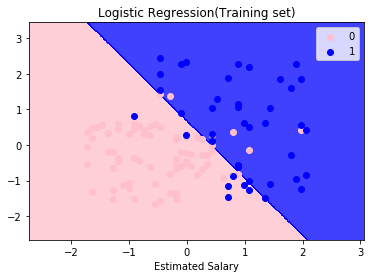

Accuracy: accuracy_score : 88.33333333333333
Accuracy: average_precision_score : 74.60192345825897
Accuracy:  balanced_accuracy_score : 87.03303488731089
Accuracy:  hamming_loss : 0.11666666666666667
Accuracy:  fbeta_score : 88.33333333333333


In [8]:
class Support_Vector_Machine:
    
    def feature_scale(self,x_test):
        sc_x = StandardScaler()
        x_test = sc_x.fit_transform(x_test)
        return x_test
        
    # load logistic regression model
    
    def load(self):
        # dump train model pickle file
        file = open('trainmodel.pkl', 'rb')
        pickle_in = pickle.load(file)
        return pickle_in
    
    # confusion matrix
    
    def confusion_matrix(self,y_test,y_predict): 
        cm = confusion_matrix(y_test,y_predict)
        return cm
    
    
    
def main(x_test,y_test):
    
    # object
    object_LR = Support_Vector_Machine()
    
    
    x_test = object_LR.feature_scale(x_test)    
    pickle_in = object_LR.load()
    
    y_predict = object_common_function.prediction(x_test,pickle_in)
    
    confusion_mat = object_LR.confusion_matrix(y_test,y_predict)
    print("\n confusion_matrix\n",confusion_mat )
    
    object_common_function.visualisation(x_test,y_test,pickle_in)
    
    accuracy,accuracy1,accuracy2,accuracy3,acc = object_common_function.Accuracy(y_test,y_predict)
    
    
    
if __name__ == '__main__':
    main(x_test,y_test)